In [1]:
import pandas as pd
import numpy as np

In [ ]:
def yeOldeDFCombiner(df1, df2):
    df1_df2 = pd.concat([df1, df2], sort=False, verify_integrity=True, axis=0)
    df1_df2 = df1_df2.fillna(float(0))
    return df1_df2

In [145]:
#reading in and organizing data, both ASV tables and taxa tables
mtu_df = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/mtuFrame2.csv")
straits_df = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/straitsFrame.csv")
seasons_df = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/seasonsFrame.csv")
seasons_df_spring = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/spring_seasonsFrame.csv")

straits_df = straits_df.drop(columns = "rowname")
straits_df["Sample"] = straits_df["Unnamed: 0"] + "," + straits_df["Run"]
straits_df = straits_df.drop(columns = ["Unnamed: 0", "Run"])
straits_df = straits_df.set_index("Sample")

mtu_df = mtu_df.drop(columns = "rowname")
mtu_df["Sample"] = mtu_df["SampleName"] + "," + mtu_df["Run"]
mtu_df = mtu_df.drop(columns = ["Unnamed: 0", "Run", "SampleName"])
mtu_df = mtu_df.set_index("Sample")

seasons_df.rename(columns = {'Unnamed: 0':'Sample'}, inplace = True)
seasons_df = seasons_df.set_index("Sample")

seasons_df_spring.rename(columns = {'Unnamed: 0':'Sample'}, inplace = True)
seasons_df_spring = seasons_df_spring.set_index("Sample")

straits_tax = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/straitsTaxtab.csv")
straits_tax = straits_tax.set_index(['Unnamed: 0'])

mtu_tax = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/mtuTaxtab2.csv")
mtu_tax = mtu_tax.set_index(['Unnamed: 0'])

seasons_tax = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/seasonsTaxtab.csv")
seasons_tax = seasons_tax.set_index(['Unnamed: 0'])

seasons_tax_spring = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/spring_seasonsTaxtab.csv")
seasons_tax_spring = seasons_tax_spring.set_index(['Unnamed: 0'])

seasons_df_total = yeOldeDFCombiner(seasons_df, seasons_df_spring)

seasons_tax_total = seasons_tax.merge(seasons_tax_spring, on= 'Unnamed: 0')
seasons_tax_total = seasons_tax_total.drop(columns=['Kingdom_y', 'Phylum_y', 'Class_y', 'Order_y', 'Family_y', 'Genus_y'])
seasons_tax_total = seasons_tax_total.rename(columns={'Kingdom_x':'Kingdom', 'Phylum_x':'Phylum','Class_x':'Class','Order_x':'Order','Family_x':'Family','Genus_x':'Genus'})

In [3]:
#filtering rows for samples that have more than 1000 reads
def dffilterer7000 (df):
    return df[(df.sum(axis=1,numeric_only=True) > 1000)]

In [4]:
# replacing column names with family
def unknownTaxReplacer4000(row):
    if pd.isnull(row["Family"]):
        if pd.isnull(row["Order"]):
            if pd.isnull(row["Class"]):
                if pd.isnull(row["Phylum"]):
                    if pd.isnull(row["Kingdom"]):
                        return "Unknown"
                    else: 
                        return row["Kingdom"]
                else:
                    return row["Phylum"]
            else:
                return row["Class"]
        else: 
            return row["Order"]
    elif row["Family"] == "Unknown Family":
        if pd.isnull(row["Genus"]):
            if pd.isnull(row["Order"]):
                if pd.isnull(row["Class"]):
                    if pd.isnull(row["Phylum"]):
                        if pd.isnull(row["Kingdom"]):
                            return "Unknown"
                        else: 
                            return row["Kingdom"]
                    else:
                        return row["Phylum"]
                else:
                    return row["Class"]
            else: 
                return row["Order"]
        else:
            return row["Genus"]
    else:
        return row["Family"]
    
def unknownTaxReplacer5000(row):
    if pd.isnull(row["Order"]):
        if pd.isnull(row["Class"]):
            if pd.isnull(row["Phylum"]):
                if pd.isnull(row["Kingdom"]):
                    return "Unknown"
                else: 
                    return row["Kingdom"]
            else:
                return row["Phylum"]
        else:
            return row["Class"]
    else: 
        return row["Order"]
        
def unknownTaxReplacer3000(row):
    if pd.isnull(row["Genus"]):
        if pd.isnull(row["Family"]) or row["Family"] == "Unknown Family":
            if pd.isnull(row["Order"]):
                if pd.isnull(row["Class"]):
                    if pd.isnull(row["Phylum"]):
                        if pd.isnull(row["Kingdom"]):
                            return "Unknown"
                        else: 
                            return row["Kingdom"]
                    else:
                        return row["Phylum"]
                else:
                    return row["Class"]
            else: 
                return row["Order"]
        else:
            return row["Family"]
    else:
        return row["Genus"]
                
               
#replace column name with family
def taxreplacer4000(tax_df, frame_df):
    df_repl = frame_df.transpose()
    df_replm = df_repl.merge(tax_df, left_index = True, right_index=True)
    df_replm["Family"] = df_replm.apply(unknownTaxReplacer4000, axis=1)
    df_replm = df_replm.drop(columns=['Kingdom','Phylum','Class','Order','Genus'])
    df_replm = df_replm.groupby('Family').sum()
    df_out = df_replm.transpose()
    df_out.index.name = "Sample"
    return df_out

#replace column name with order
def taxreplacer5000(tax_df, frame_df):
    df_repl = frame_df.transpose()
    df_replm = df_repl.merge(tax_df, left_index = True, right_index=True)
    df_replm["Order"] = df_replm.apply(unknownTaxReplacer5000, axis=1)
    df_replm = df_replm.drop(columns=['Kingdom','Phylum','Class','Family','Genus'])
    df_replm = df_replm.groupby('Order').sum()
    df_out = df_replm.transpose()
    df_out.index.name = "Sample"
    return df_out

#replace column names with genus
def taxreplacer3000(tax_df, frame_df):
    df_repl = frame_df.transpose()
    df_replm = df_repl.merge(tax_df, left_index = True, right_index=True)
    df_replm["Genus"] = df_replm.apply(unknownTaxReplacer3000, axis=1)
    df_replm = df_replm.drop(columns=['Kingdom','Phylum','Class','Family','Order'])
    df_replm = df_replm.groupby('Genus').sum()
    df_out = df_replm.transpose()
    df_out.index.name = "Sample"
    return df_out

In [5]:
#normalizing the data in rows
def dfnormalizer3000(df, total = False):
    if total == True:
        df.apply(lambda x: x/df.sum(),axis=0)
    else:
        return df.apply(lambda x: x/x.sum(), axis=1)

In [135]:
#returns 0 or 1 based on oiled or not
def whatever (row):
    if "CONTROL" in row["Sample"] or "control" in row["Sample"] or "Control" in row["Sample"]:
        return 0
    if "DBIT" in row["Sample"] or "diesel" in row["Sample"] or "Diesel" in row["Sample"]:
        return 1
    if "BAK" in row["Sample"] or "bakken" in row["Sample"] or "Bakken" in row["Sample"]:
        return 1
    if "NB" in row["Sample"] or "NS" in row["Sample"]:
        return 0
    else: 
        print (row["Sample"])
        return 0

In [7]:
#for predicting different types of oil
#returns 0 for diesel, 1 for bakken, 2 for dilbit
def whatever2 (row):
    if "diesel" in row["Sample"] or "Diesel" in row["Sample"]:
        return 0
    if "BAK" in row["Sample"] or "bakken" in row["Sample"] or "Bakken" in row["Sample"]:
        return 1
    if "DBIT" in row["Sample"]:
        return 2
    else: 
        print (row["Sample"])
        return 79

In [8]:
#creating a correlation matrix and dropping corelated values
def dropCorrelated(df):
    correlation_matrix=df.corr()
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return df.drop(labels=correlated_features, axis=1, inplace=False)

In [136]:
#returns X and Y of dataset
def X_Ymaker2000(df, predicting = whatever, to_numpy = True):
#determining Ys for the samples = 0 for no oil, 1 for oil
    df_noindex = df.reset_index()
    if to_numpy:
        return df.to_numpy(), df_noindex.apply(lambda x: predicting(x), axis=1).to_numpy(), df.columns, df.columns.values
    else:
        return df, df_noindex.apply(lambda x: predicting(x), axis=1).to_numpy(), df.columns, df.columns.values

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

#function to run k-fold cross validation,reports AUPRC for each fold and aggregate AUPRC
def Kfmodel(X, y, clf, graph_out=None, out=None, n_splits=5):
    plt.close('all')
    f, axes = plt.subplots(figsize=(6,4), sharex = True, sharey = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
              
    logoloss = []

    y_real = []
    y_proba = []
    accuracies = []
    F1 = []

    for i, (train_index, test_index) in enumerate(k_fold.split(X)):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        clf.fit(Xtrain, ytrain)
        pred_proba = clf.predict_proba(Xtest)
        y_pred = clf.predict(Xtest)
        precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
        lab = 'Fold %d AUPRC=%.2f' % (i+1, auc(recall, precision))
        axes.step(recall, precision, label=lab)
        axes.set(xlim=(0, 1), xticks=[0.0,0.2,0.4,0.6,0.8,1.0],
               ylim=(0.6, 1.05), yticks=[0.6, 0.7, 0.8, 0.9, 1.0])
        y_real.append(ytest)
        y_proba.append(pred_proba[:,1])
        accuracies.append(accuracy_score(ytest, y_pred))
        F1.append(f1_score(ytest, y_pred))
        logoloss.append(sklearn.metrics.log_loss(ytest, y_pred))
    
#https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab = 'Overall AUC=%.2f' % (auc(recall, precision))
    axes.step(recall, precision, label=lab, color='black')
    axes.set(xlim=(0, 1), xticks=[0.0,0.2,0.4,0.6,0.8,1.0],
               ylim=(0.6, 1.05), yticks=[0.6, 0.7, 0.8, 0.9, 1.0])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    axes.legend(loc='lower left', fontsize='small')

    plt.tight_layout()
    
    if graph_out != None:
        plt.savefig(graph_out, bbox_inches='tight', dpi=150)
    
    if out != None:
        out.write("Accuracy over all runs: " + str(accuracies) + '\n')
        out.write("Average accuracy: " + str(np.average(accuracies)) + " and std: " + str(np.std(accuracies)) + '\n')
        out.write("F1 statistic over all runs: " + str(F1) + '\n')
        out.write("F1 statistic average over all runs: " + str(np.average(F1)) + " and std: " + str(np.std(F1)) + '\n')
        out.write("Log loss over all runs: " + str(logoloss) + '\n')
        out.write("Log loss average: " + str(np.average(logoloss)) + " and std: " + str(np.std(logoloss)) + '\n')
        out.write('\n')
    else:
        print("Accuracy over all runs: " + str(accuracies) + '\n')
        print("Average accuracy: " + str(np.average(accuracies)) + " and std: " + str(np.std(accuracies)) + '\n')
        print("F1 statistic over all runs: " + str(F1) + '\n')
        print("F1 statistic average over all runs: " + str(np.average(F1)) + " and std: " + str(np.std(F1)) + '\n')
        print("Log loss over all runs: " + str(logoloss) + '\n')
        print("Log loss average: " + str(np.average(logoloss)) + " and std: " + str(np.std(logoloss)) + '\n')
    plt.close()
    return clf

In [138]:
from sklearn.feature_selection import RFECV
#selecting features using RFECV
def featureSelect(X, Y, clf, step = 100, n_splits = 5, out=None):
    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(
        estimator=clf,
        step=step,
        cv=KFold(n_splits=n_splits),
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
    )
    rfecv.fit(X, Y)
    if out is not None:
        out.write("Optimal number of features : %d" % rfecv.n_features_ + '\n')

    else:
        print("Optimal number of features : %d" % rfecv.n_features_ + '\n')
    return rfecv

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#function to hyperparameter-tune
def griddle(X, Y, estimator = (RandomForestClassifier(random_state=42, bootstrap = False)), param_grid =  { 
    'n_estimators': [1, 10, 100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [1,4,5,6,7,8, None],
    'criterion' :['gini', 'entropy']
}, cv = 5,out=None):

    search_cv = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5)
    search_cv.fit(X, Y)
    if out is not None:
        out.write(str(search_cv.best_params_) + '\n')

    else:
        print(search_cv.best_params_)
    return search_cv

In [146]:
#pre-processing pipeline; filters, organizes, and normalizes datasets
def PreproPipeline(df, tax_df, level = "family", pp_predicting = whatever, returned = 'relab'):
    df_filt = dffilterer7000(df) #filter
    #determine level of taxonomic classification
    if level == "family":
        df_filt = taxreplacer4000(tax_df, df_filt)
    elif level == "order":
        df_filt = taxreplacer5000(tax_df, df_filt)
    elif level == "genus":
        df_filt = taxreplacer3000(tax_df, df_filt)
    else:
        print("enter level of family, order, or genus")
        return
    if returned == 'relab':
        return dfnormalizer3000(df_filt)
    else:
        return df_filt

In [140]:
#entire random forest pipeline - feature selection, hyperparameter-tuning, 5-fold cross validation, model validation
def RFPipeline(X, Y, outp=None, pipe_graph_out=None, lame=False, rf_predicting = whatever):
    rfecv0 = featureSelect(X, Y, RandomForestClassifier(random_state=42), step=10,out=outp)
    X = rfecv0.transform(X)
        #search_cv = griddle(X, Y, RandomForestClassifier(random_state=42))
    search_cv = griddle(X, Y, RandomForestClassifier(random_state=42), param_grid =  { 
    'n_estimators': [1, 10, 100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [1,4,5,6,7,8, None],
    'criterion' :['gini', 'entropy']
     },out=outp) #hyperparameter tuning
    pars = search_cv.best_params_
    clf = Kfmodel(X, Y, RandomForestClassifier(n_estimators = pars['n_estimators'], max_depth = pars['max_depth'],
                                                 max_features = pars['max_features'], criterion= pars['criterion'], random_state=42),out=outp,graph_out=pipe_graph_out) #running model
    clf.fit(X,Y)
    return clf, rfecv0


    

In [141]:
#function to properly combine datasets
def merger(orig, new):
    mergin = orig.transpose().merge(new.transpose(), how='left', left_index=True, right_index=True).transpose().merge(orig, left_index=True, right_index=True, how='left', indicator=True, suffixes=('', '_y')).query('_merge == "left_only"').drop('_merge', 1)
    mergin2 = mergin.drop(mergin.filter(regex='_y$').columns, axis=1)
    mergin = mergin2.replace(np.nan,0)
    return mergin

In [147]:
def transformTestData(trained_df, test_df, feature_sel = None, TTDpredicting = whatever):
    transformed_test_df = merger(trained_df, test_df)
    return X_Ymaker2000(transformed_test_df, predicting = TTDpredicting)

In [142]:
from collections import OrderedDict
#reports important features in order of importances
def outImportFeats(model, dataframe, rfecv_here):
    importance = model.feature_importances_
    cols = list(dataframe.columns)
    cols = np.array(cols)
    feats = cols[rfecv_here.support_ == True]

    feature_dict = OrderedDict()
    for i in range(len(feats)):
        feature_dict[feats[i]] = importance[i]

    feature_dict = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1])}
    els = list(feature_dict.items())
    return els[-25:]

In [143]:
#reports only top 10 important features
def returnTenFeats(model, dataframe, rfecv_here):
    importance = model.feature_importances_
    cols = list(dataframe.columns)
    cols = np.array(cols)
    feats = cols[rfecv_here.support_ == True]

    feature_dict = OrderedDict()
    for i in range(len(feats)):
        feature_dict[feats[i]] = importance[i]

    feature_dict = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1])}
    els = list(feature_dict.items())
    els = els[-10:]
    return [x[0] for x in els]

In [144]:
from sklearn import metrics
#RF pipeline for testing on outside data
def RFOutsideTest(df_to_train, df_to_test, feature_select=None, clf=None, lame=True, outp= None, ll = True, graph=None, RFOTpredicting = whatever):
    if (clf is not None):
        X_to_test, Y_to_test, t, p = transformTestData(df_to_train, df_to_test, TTDpredicting = RFOTpredicting)
        X_to_train, Y_to_train, x_cols, x_cols_values = X_Ymaker2000(df_to_train, predicting = RFOTpredicting)
        clf.fit(X_to_train, Y_to_train)
        
        search_cv = griddle(X_to_train, Y_to_train, RandomForestClassifier(random_state=42), param_grid =  { 
        'n_estimators': [1, 10, 100, 200, 500],
        'max_features': ['auto', 'log2'],
        'max_depth' : [1,4,5,6,7,8, None],
        'criterion' :['gini', 'entropy']
        },out=outp)
        
        pars = search_cv.best_params_
        clf = RandomForestClassifier(n_estimators = pars['n_estimators'], max_depth = pars['max_depth'],
                                                 max_features = pars['max_features'], criterion= pars['criterion'], random_state=42)
        
        clf.fit(X_to_train, Y_to_train)
    
    else:
        print("help")
        X, Y, x_cols, x_cols_values = X_Ymaker2000(df_to_train, predicting = RFOTpredicting)
        X_to_test, Y_to_test, t, p = transformTestData(df_to_train, df_to_test, TTDpredicting = RFOTpredicting)
        clf = RandomForestClassifier(random_state=42)
        
        rfecv = featureSelect(X, Y, RandomForestClassifier(random_state=42), step=100, out=outp) #feature select 100, 10, then 1
        X = rfecv.transform(X)
        X_to_test = rfecv.transform(X_to_test)
        
        search_cv = griddle(X, Y, RandomForestClassifier(random_state=42), param_grid =  { 
        'n_estimators': [1, 10, 100, 200, 500],
        'max_features': ['auto', 'log2'],
        'max_depth' : [1,4,5,6,7,8, None],
        'criterion' :['gini', 'entropy']
        },out=outp)
        
        pars = search_cv.best_params_
        clf = RandomForestClassifier(n_estimators = pars['n_estimators'], max_depth = pars['max_depth'],
                                                 max_features = pars['max_features'], criterion= pars['criterion'], random_state=42)
        
        clf.fit(X, Y)
    
    Y_pred = clf.predict(X_to_test)
    if outp is not None:
        outp.write("Accuracy of the model: " + str(metrics.accuracy_score(Y_to_test, Y_pred)) +"\n")
        outp.write("F1 statistic of the model: " + str(metrics.f1_score(Y_to_test, Y_pred)) + '\n')
        if ll:
            outp.write("Log loss of the model: " + str(metrics.log_loss(Y_to_test, Y_pred)) + '\n')
        pred_proba = clf.predict_proba(X_to_test)
        precision, recall, _ = precision_recall_curve(Y_to_test, pred_proba[:,1])
        plt.yticks([0.6, 0.7, 0.8, 0.9, 1.0])
        plt.xticks([0.2,0.4,0.6,0.8,1.0])
        plt.ylim([0.6, 1.05])
        plt.xlim([0, 1])
        plt.step(recall, precision, label='Model AUPRC=%.2f' % (auc(recall, precision)), lw=2, color='black')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower left', fontsize='small')
        if graph is not None:
            plt.savefig(graph, bbox_inches='tight', dpi=150)
        plt.close()
        
        
    else:
        print("Accuracy of the model: " + str(metrics.accuracy_score(Y_to_test, Y_pred)) +"\n")
        print("F1 statistic of the model: " + str(metrics.f1_score(Y_to_test, Y_pred)) + '\n')
        if ll:
            print("Log loss of the model: " + str(metrics.log_loss(Y_to_test, Y_pred)) + '\n')
    return Y_pred

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

def seetree (clf):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    return tree.plot_tree(clf.estimators_[0],
               #feature_names = fn, 
               class_names=True,
               filled = True)

In [24]:
import pickle
def diffGroupingsSimplified(df1, df2, df3, df1_tax, df2_tax, df3_tax, name1, name2, name3, pipeline, out, dggraph_out, DGpredicting = whatever):
     
# preprocess for each dataframe + taxa level
    df1_gen = PreproPipeline(df1, df1_tax, level = "genus", pp_predicting = DGpredicting)
    df2_gen = PreproPipeline(df2, df2_tax, level = "genus", pp_predicting = DGpredicting)
    df3_gen = PreproPipeline(df3, df3_tax, level = "genus", pp_predicting = DGpredicting)
    df_gens = [df1_gen, df2_gen, df3_gen]
        
    df1_gen_x, df1_gen_y, df1_cols, df1_cols_vals = X_Ymaker2000(df1_gen, predicting = DGpredicting)
    df2_gen_x, df2_gen_y, df2_cols, df2_cols_vals = X_Ymaker2000(df2_gen, predicting = DGpredicting)
    df3_gen_x, df3_gen_y, df3_cols, df3_cols_vals = X_Ymaker2000(df3_gen, predicting = DGpredicting)
    df_xy = [(df1_gen_x, df1_gen_y, df1_cols, df1_cols_vals), (df2_gen_x, df2_gen_y, df2_cols, df2_cols_vals), (df3_gen_x, df3_gen_y, df3_cols, df3_cols_vals)]
    
    names = [name1, name2, name3]
    topTen = [0, 0, 0]
    
    clf_transformer = []
    for i in range(3):
        f = open(out, 'a')
        f.write("start of run for " + names[i] +" organized by genus\n")
        f.write("--------------\n")
        clf, rfecv_now = pipeline(df_xy[i][0], df_xy[i][1], outp=f, pipe_graph_out = dggraph_out + names[i] + '[genus].jpg', rf_predicting = DGpredicting)

        f.write('\n')
        f.write(str(outImportFeats(clf, df_gens[i], rfecv_now)))
        
        pickle.dump(clf, open(dggraph_out + names[i] + '_clf[genus].sav', 'wb'))
        clf_transformer.append((clf, rfecv_now))
        f.write("\n")
        f.close()
        topTen[i] = returnTenFeats(clf, df_gens[i], rfecv_now)

#test model on outside data
    for i in range(3):
        for j in range(3):
            if i != j:
                f = open(out, 'a')
                f.write("start of run for training on " + names[i] +" and testing on " + names[j] + " organized by genus\n")
                f.write("--------------\n")
                RFOutsideTest(df_gens[i], df_gens[j], feature_select=clf_transformer[i][1], clf=clf_transformer[i][0], 
                              outp = f, graph = dggraph_out + names[i] + '_test_on_' + names[j] + '[genus].jpg', RFOTpredicting = DGpredicting)
                f.write("\n")
                f.close()
#

# # train on everything, test on self
# # i + j + k -> i + j + k
    twotogether = yeOldeDFCombiner(df1_gen, df2_gen)
    gen_together = yeOldeDFCombiner(twotogether, df3_gen)
    
    all_clf_transformer = []
    
    f = open(out, 'a')  
    f.write("start of run for all combined organized by genus\n")
    f.write("--------------\n")
    X_g, Y_g, X_g_cols, X_g_cols_vals = X_Ymaker2000(gen_together, predicting = DGpredicting)
    clf_all, rfecv_all = pipeline(X_g, Y_g, outp=f, pipe_graph_out=dggraph_out + "all_together" + '[genus].jpg', rf_predicting = DGpredicting)
    f.write('\n')
    f.write(str(outImportFeats(clf_all, gen_together, rfecv_all)))
        
    pickle.dump(clf, open(dggraph_out + names[i] + '_clf[genus].sav', 'wb'))
    all_clf_transformer.append((clf, rfecv_all))
    f.write("\n")
    f.close()
    return topTen[0], topTen[1], topTen[2]

In [124]:
straits_sliced10, mtu_sliced10, seasons_sliced10 = diffGroupingsSimplified(straits_df, mtu_df, seasons_df_total, straits_tax, mtu_tax, seasons_tax_total, "straits", "mtu","seasons", RFPipeline, out="FinalOilMLOutput/oneOilType/log_feat_model.txt", dggraph_out="FinalOilMLOutput/oneOilType/")

In [148]:
#preparing datasets to be used for top 10 predictions as well as oil type prediction
straits_prep = PreproPipeline(straits_df, straits_tax, level = "genus", pp_predicting = whatever)
mtu_prep = PreproPipeline(mtu_df, mtu_tax, level = "genus", pp_predicting = whatever)
seasons_prep = PreproPipeline(seasons_df_total, seasons_tax_total, level = "genus", pp_predicting = whatever)

straits_x, straits_y, straits_col, straits_val = X_Ymaker2000(straits_prep)
mtu_x, mtu_y, mtu_col, mtu_val = X_Ymaker2000(mtu_prep)
seasons_x, seasons_y, seasons_col, seasons_val = X_Ymaker2000(seasons_prep)

# Here be biosensing/reduced feature models section

In [149]:
#training models using top 10 features reported from previous models
def slicedModels(df_prep_list, dfname_list, num, out='FinalOilMLOutput/OneOilSlicedCombo/sliced_combo.txt', pipeline=RFPipeline,smgraph_out='FinalOilMLOutput/OneOilSlicedCombo/', smpredicting = whatever):
    df_xy = []
    clf_transformer = []
    for i in range(len(df_prep_list)):
        df_xy.append(X_Ymaker2000(df_prep_list[i], predicting = whatever))
        
    for i in range(3):
        f = open(out, 'a')
        f.write("start of run for " + dfname_list[i] +" organized by genus\n")
        f.write("------------------------------------------\n")
        clf, rfecv_now = pipeline(df_xy[i][0], df_xy[i][1], outp=f, pipe_graph_out = smgraph_out + dfname_list[i] + '_sliced' + num + '[genus].jpg', rf_predicting = smpredicting)

        f.write('\n')
        f.write(str(outImportFeats(clf, df_prep_list[i], rfecv_now)))

        clf_transformer.append((clf, rfecv_now))
        f.write("\n")
        f.close()
    
    for i in range(3):
        for j in range(3):
            if i != j:
                f = open(out, 'a')
                f.write("start of run for training on " + dfname_list[i] +" and testing on " + dfname_list[j] + " organized by genus\n")
                f.write("--------------\n")
                RFOutsideTest(df_prep_list[i], df_prep_list[j], feature_select=clf_transformer[i][1], clf=clf_transformer[i][0], 
                              outp = f, graph = smgraph_out + dfname_list[i] + '_test_on_' + dfname_list[j] + '_sliced' + num + '[genus].jpg', RFOTpredicting = smpredicting)
                f.write("\n")
                f.close()
    

In [285]:
slicedModels([straits_prep[straits_sliced10], mtu_prep[straits_sliced10], seasons_prep[seasons_sliced10]], ['straits','mtu','seasons'],'10')

# Here be the type of oil section


In [ ]:
#prepare and combine all datasets, clearing out controls
mtu_prep2 = PreproPipeline(mtu_df, mtu_tax, level = "genus", pp_predicting = whatever2)
straits_prep2 = PreproPipeline(straits_df, straits_tax, level = "genus", pp_predicting = whatever2)
seasons_prep2 = PreproPipeline(seasons_df_total, seasons_tax_total, level = "genus", pp_predicting = whatever2)

all_prep2 = yeOldeDFCombiner(mtu_prep2, seasons_prep2)
all_prep2 = yeOldeDFCombiner(all_prep2, straits_prep2)

all_df_clear = all_prep2[all_prep2.index.str.contains("CONTROL") == False]
all_df_clear = all_df_clear[all_df_clear.index.str.contains("Control") ==False]
all_df_clear = all_df_clear[all_df_clear.index.str.contains("control") ==False]
all_df_clear = all_df_clear[all_df_clear.index.str.contains("NB") ==False]
all_df_clear = all_df_clear[all_df_clear.index.str.contains("NS") ==False]

In [46]:
#prepare and combine all datasets from only the summer, clearing out controls
seasons_metadata2 = pd.read_csv("~/Oil_ML/Great_Lakes_Oil/Seasons_Real/Season_metadata_v2.csv")
summer_seasons = seasons_metadata2[seasons_metadata2['Season'] == 'summer']['Sample_Name']
seasons_prep_summer = seasons_prep2[seasons_prep2.index.isin(summer_seasons)]

all_prep_summer = yeOldeDFCombiner(mtu_prep2, seasons_prep_summer)
all_prep_summer = yeOldeDFCombiner(all_prep_summer, straits_prep2)

all_prep_summer = all_prep_summer[all_prep_summer.index.str.contains("CONTROL") == False]
all_prep_summer = all_prep_summer[all_prep_summer.index.str.contains("Control") ==False]
all_prep_summer = all_prep_summer[all_prep_summer.index.str.contains("control") ==False]
all_prep_summer = all_prep_summer[all_prep_summer.index.str.contains("NB") ==False]
all_prep_summer = all_prep_summer[all_prep_summer.index.str.contains("NS") ==False]

In [232]:
x_all_summer, y_all_summer, all_summer_col, all_summer_val = X_Ymaker2000(all_prep_summer, predicting = whatever2)

In [ ]:
x_all_type, y_all_type, all_type_col, all_type_val = X_Ymaker2000(all_df_clear, predicting = whatever2)

In [150]:
from sklearn.preprocessing import label_binarize
#k-fold cross-validation function for multiple classes
def KfmodelMulticlass(X, y, classes, clf=None, graph_out=None, out=None, n_splits=5):
    plt.close('all')
    f, axes = plt.subplots(figsize=(6,4), sharex = True, sharey = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
              
    logoloss = []

    y_real = []
    y_proba = []
    accuracies = []
    F1 = []
    
    n_classes = len(classes)
    precision_dict = dict()
    recall_dict = dict()
    __dict = dict()
    y_proba = dict()
    y_real = dict()
    for j in range(n_classes):
        y_real[j] = []
        y_proba[j] = []
    y_binarized = label_binarize(y, classes=[*range(n_classes)])
    for i, (train_index, test_index) in enumerate(k_fold.split(X)):
            Xtrain, Xtest = X[train_index], X[test_index]
            ytrain, ytest = y_binarized[train_index], y_binarized[test_index]
            clf.fit(Xtrain, ytrain)
            pred_proba = clf.predict_proba(Xtest)
            for p in range(n_classes):
                y_real[p].append(ytest[:,p])
                y_proba[p].append(pred_proba[p][:,1])
    for j in range(n_classes):
        y_real[j] = np.concatenate(y_real[j])
        y_proba[j] = np.concatenate(y_proba[j])
    for m in range(n_classes):
        precision_dict[m], recall_dict[m], __dict[m] = precision_recall_curve(y_real[m], y_proba[m])
        lab = str(classes[m]) + ' prediction AUPRC=%.2f' % (auc(recall_dict[m], precision_dict[m]))
        axes.step(recall_dict[m], precision_dict[m], label=lab)
        axes.set(xlim=(0, 1), xticks=[0.0,0.2,0.4,0.6,0.8,1.0],
               ylim=(0.6, 1.05), yticks=[0.6, 0.7, 0.8, 0.9, 1.0])
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        axes.legend(loc='lower left', fontsize='small')
        plt.tight_layout()
    if graph_out != None:
        plt.savefig(graph_out, bbox_inches='tight', dpi=150)
    
    if out != None:
        out.write("Accuracy over all runs: " + str(accuracies) + '\n')
        out.write("Average accuracy: " + str(np.average(accuracies)) + " and std: " + str(np.std(accuracies)) + '\n')
        out.write("F1 statistic over all runs: " + str(F1) + '\n')
        out.write("F1 statistic average over all runs: " + str(np.average(F1)) + " and std: " + str(np.std(F1)) + '\n')
        out.write("Log loss over all runs: " + str(logoloss) + '\n')
        out.write("Log loss average: " + str(np.average(logoloss)) + " and std: " + str(np.std(logoloss)) + '\n')
        out.write('\n')
    else:
        print("Accuracy over all runs: " + str(accuracies) + '\n')
        print("Average accuracy: " + str(np.average(accuracies)) + " and std: " + str(np.std(accuracies)) + '\n')
        print("F1 statistic over all runs: " + str(F1) + '\n')
        print("F1 statistic average over all runs: " + str(np.average(F1)) + " and std: " + str(np.std(F1)) + '\n')
        print("Log loss over all runs: " + str(logoloss) + '\n')
        print("Log loss average: " + str(np.average(logoloss)) + " and std: " + str(np.std(logoloss)) + '\n')
    plt.close()
    return clf

In [151]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
#random forest model for multiple classes
def RFPipelineMulticlass(X, Y, classes, outp=None, pipe_graph_out=None, lame=False, rf_predicting = whatever):
    rfecv0 = featureSelect(X, Y, RandomForestClassifier(random_state=42), step=10,out=outp)
    X = rfecv0.transform(X)
    search_cv = griddle(X, Y, RandomForestClassifier(random_state=42), param_grid =  { 
    'n_estimators': [1, 10, 100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [1,4,5,6,7,8, None],
    'criterion' :['gini', 'entropy']
     },out=outp) #hyperparameter tuning
    pars = search_cv.best_params_
    clf = KfmodelMulticlass(X, Y, classes, RandomForestClassifier(n_estimators = pars['n_estimators'], max_depth = pars['max_depth'],
                                                 max_features = pars['max_features'], criterion= pars['criterion'], random_state=42),out=outp,graph_out=pipe_graph_out) #running model
    return clf, rfecv0

In [ ]:
file_ = open('FinalOilMLOutput/twoOilTypes/twoOilOutput.txt', 'a')

In [ ]:
clf_type, rfecv = RFPipelineMulticlass(x_all_type, y_all_type, classes = ['Diesel','Bakken','Dilbit'], outp=file_, pipe_graph_out = "FinalOilMLOutput/twoOilTypes/twoOilOutput.png",rf_predicting=whatever2)

/usr/local/lib64/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [235]:
file_summer = open('FinalOilMLOutput/twoOilTypes/twoOilOutput_summer_only.txt', 'a')

In [263]:
clf_type_sum, rfecv_sum = RFPipelineMulticlass(x_all_summer, y_all_summer, classes = ['Diesel','Bakken','Dilbit'], outp=file_summer, pipe_graph_out = "FinalOilMLOutput/twoOilTypes/twoOilOutput_summer_only.png",rf_predicting=whatever2)

/usr/local/lib64/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [264]:
outImportFeats(clf_type_sum, all_prep_summer, rfecv_sum)

[('Gemmataceae', 0.01197490763870902),
 ('Polynucleobacter', 0.01203941300402075),
 ('Roseomonas', 0.012158953817205881),
 ('CL500-3', 0.012967414710366972),
 ('Aquabacterium', 0.014137605100882885),
 ('Rhodoferax', 0.014840239937730398),
 ('Sphingorhabdus', 0.01492174455734615),
 ('Pirellula', 0.015173859221054006),
 ('Candidatus Methylopumilus', 0.015410473611573319),
 ('Polymorphobacter', 0.015764885446870047),
 ('Brevundimonas', 0.016160315992444704),
 ('Prosthecobacter', 0.01664414901622228),
 ('Methylophilaceae', 0.01732819032334066),
 ('Pseudomonas', 0.017432507211722206),
 ('Saprospiraceae', 0.019602820153397434),
 ('Janthinobacterium', 0.02309739579042711),
 ('Sphingomonadaceae', 0.023335871260658083),
 ('Candidatus Planktophila', 0.024207790818953027),
 ('Hirschia', 0.024741769603179767),
 ('Roseiflexaceae', 0.025549002840684617),
 ('Hyphomonas', 0.028304549045645947),
 ('UKL13-1', 0.032465088858512785),
 ('hgcI clade', 0.03580677354438529),
 ('Caulobacter', 0.064275538023395

In [47]:
mtu_prep['Dataset'] = 'MTU'
seasons_prep['Dataset'] = 'Seasons'
straits_prep['Dataset'] = 'Straits'
all_df_labeled = yeOldeDFCombiner(mtu_prep, seasons_prep)
all_df_labeled = yeOldeDFCombiner(all_df_labeled, straits_prep)
x_all_labeled, y_all_labeled, all_labeled_col, all_labeled_val = X_Ymaker2000(all_df_labeled, to_numpy = False)      
all_df_labeled['Oiled'] = y_all_labeled
x_all_labeled, y_all_labeled, all_labeled_col, all_labeled_val = X_Ymaker2000(all_df_labeled, to_numpy = False)

# Here be PCA and t-SNE plots

In [152]:
from sklearn.decomposition import PCA
import seaborn as sns
#function to output PCA plot
def PCA_microbe(X, df):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X.drop(columns = ['Oiled','Dataset'], axis=1).to_numpy())
    with_dataset  = []
    for i in range(len(list(df['Dataset']))):
        with_dataset.append(list(principalComponents[i]))
        with_dataset[i].append(list(df['Dataset'])[i])
    plt.figure(figsize=(11,7))
    pca_df = pd.DataFrame(data = with_dataset, columns = ['dim1', 'dim2', 'Dataset'], index = X["Oiled"])
    sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Oiled', style = 'Dataset',data = pca_df)

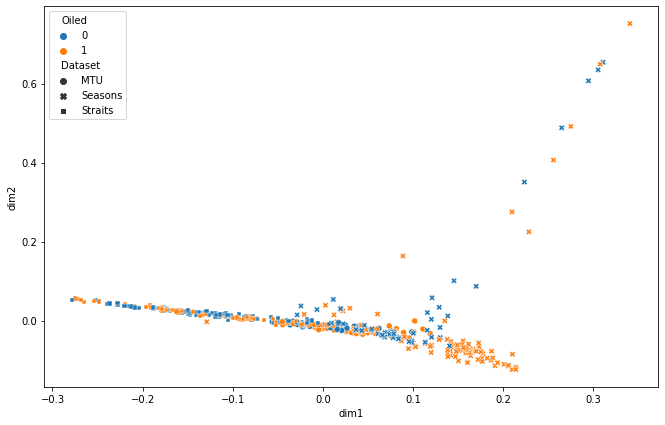

In [249]:
PCA_microbe(x_all_labeled, all_df_labeled)

In [153]:
from sklearn.manifold import TSNE
import seaborn as sns
#function to output t-SNE plots
def tsne_microbe(X, df):
    tsne = TSNE(metric = 'jaccard', perplexity=30.0)
    embeddings = tsne.fit_transform(X.drop(columns=['Dataset','Oiled']).to_numpy())
    with_datset  = []
    for i in range(len(list(df['Dataset']))):
        with_datset.append(list(embeddings[i]))
        with_datset[i].append(list(df['Dataset'])[i])
    tsne_df = pd.DataFrame(data = with_datset, columns = ['dim1', 'dim2','Dataset'], index = X["Oiled"])
    ax = sns.scatterplot(x = 'dim1', y = 'dim2', style='Dataset', hue = 'Oiled', data = tsne_df)
    h, l = ax.get_legend_handles_labels()
    l1 = ax.legend(h[:3],['Oil status','Not oiled','Oiled'], loc='lower left')
    l2 = ax.legend(h[3:],l[3:], loc='center left')
    ax.add_artist(l1)
    return ax.get_figure()

/home/akuntzleman/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning
/home/akuntzleman/.local/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


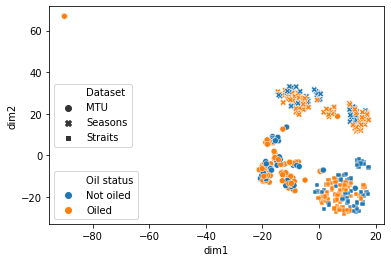

In [131]:
tsne_microbe(x_all_labeled, all_df_labeled).savefig('tsneplot.png')